In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from scipy.stats.mstats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.io.shapereader as shpreader

In [2]:
def group_year(data0, nyear):
    nmonth = 12
    data = np.zeros((nyear, nmonth, data0.shape[1], data0.shape[2]))
    for i in range(nyear):
        for j in range(nmonth):
            data[i, j, :, :] = data0[int(i*nmonth + j), :, :]
    return data

In [3]:
ds = xr.open_dataset('F:\\hwchen\\t2m_1901_2020.nc', decode_times=False)
t2m_1440 = ds['t2m'].values
t2m_year_month = group_year(t2m_1440, 120)
t2m_month = np.nanmean(t2m_year_month, axis=0)

t2m_jja = (t2m_month[5, ...] + t2m_month[6, ...] + t2m_month[7, ...])/3.
t2m_jja_max = np.nanmax(t2m_jja)
t2m_jja_min = np.nanmin(t2m_jja)
t2m_jja_mean = np.nanmean(t2m_jja)

t2m_djf = (t2m_month[11, ...] + t2m_month[0, ...] + t2m_month[1, ...])/3.
t2m_djf_max = np.nanmax(t2m_djf)
t2m_djf_min = np.nanmin(t2m_djf)
t2m_djf_mean = np.nanmean(t2m_djf)

t2m_ann = np.nanmean(t2m_month, axis=0)
t2m_ann_max = np.nanmax(t2m_ann)
t2m_ann_min = np.nanmin(t2m_ann)
t2m_ann_mean = np.nanmean(t2m_ann)

C:\Users\陈虹玮\AppData\Local\Temp\ipykernel_23268\3241526476.py:4: RuntimeWarning: Mean of empty slice
  t2m_month = np.nanmean(t2m_year_month, axis=0)
C:\Users\陈虹玮\AppData\Local\Temp\ipykernel_23268\3241526476.py:16: RuntimeWarning: Mean of empty slice
  t2m_ann = np.nanmean(t2m_month, axis=0)


Text(0.025, 0.05, 'Mean = -2.99')

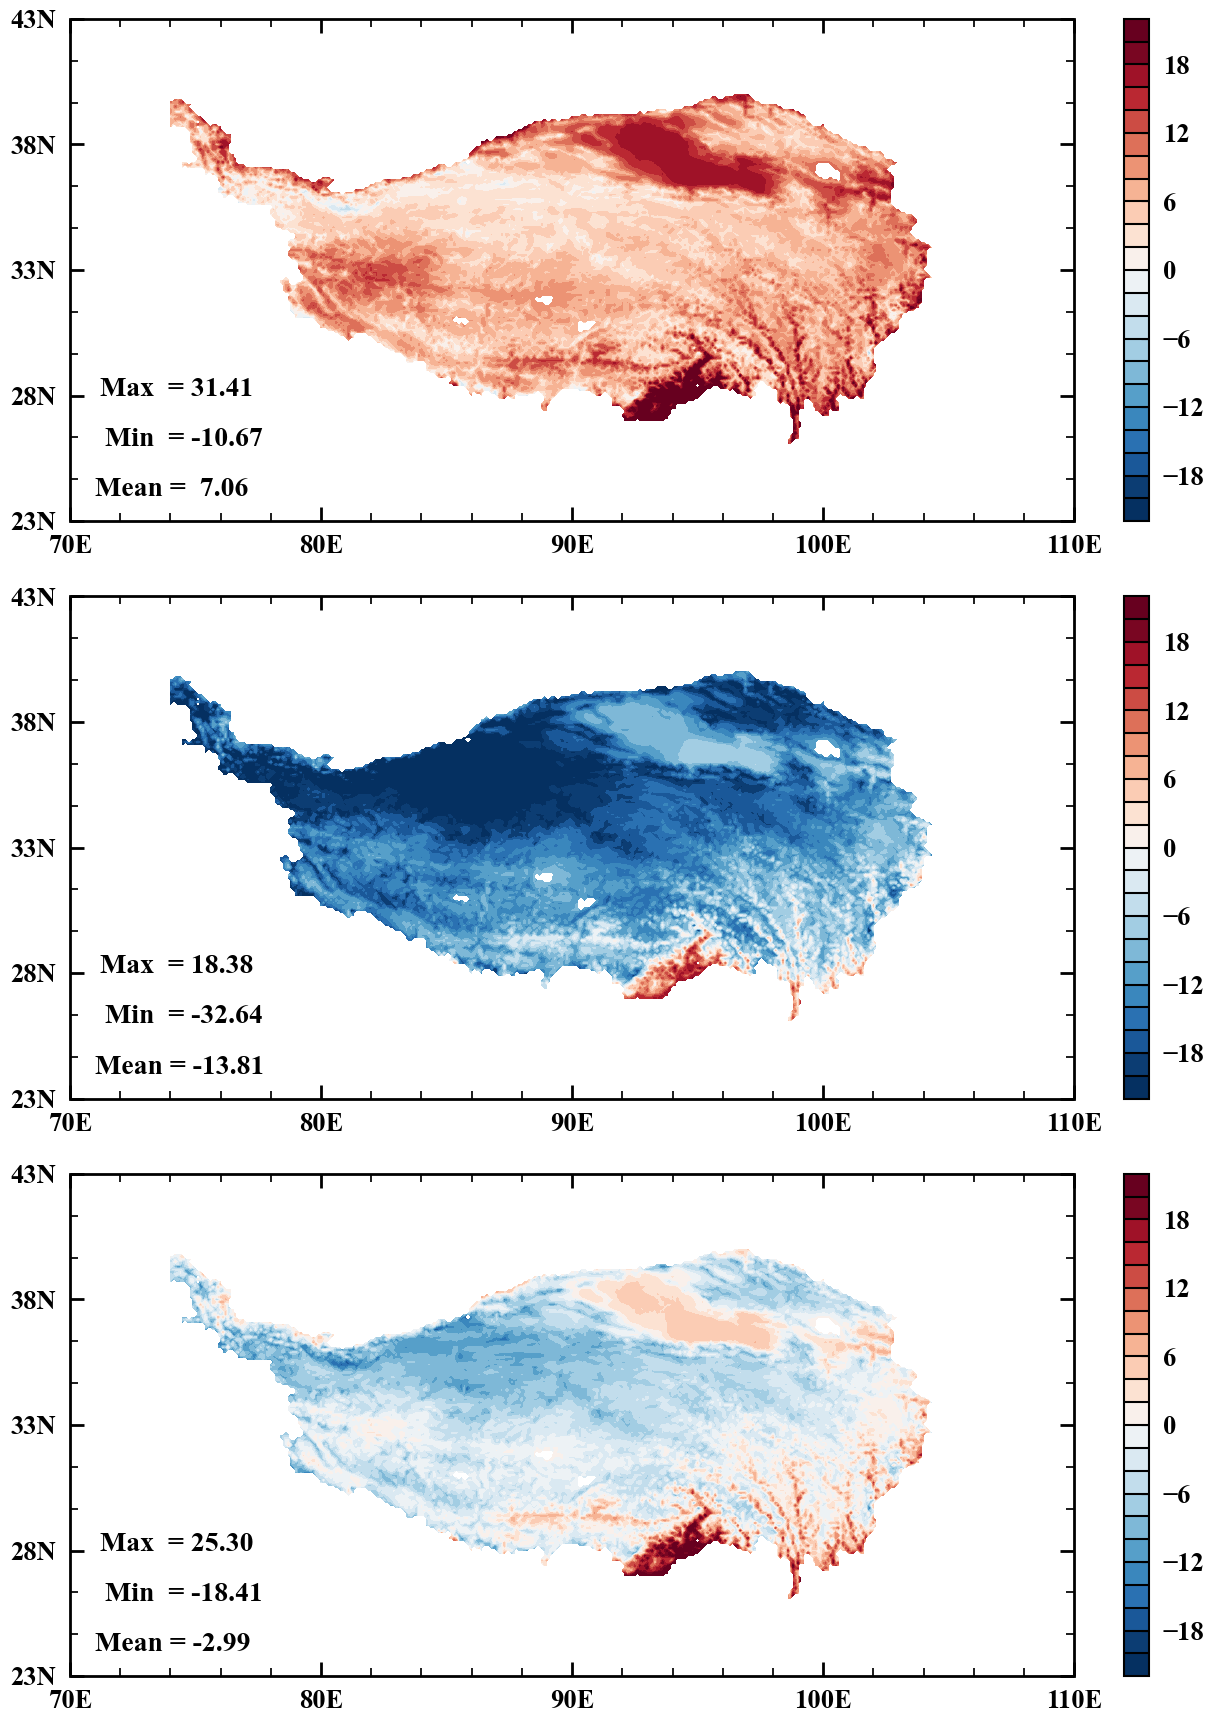

In [19]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size']= 16
lon = ds['longitude'].values
lat = ds['latitude'].values



lonmin, lonmax = 70., 110.
latmin, latmax = 23., 43.
fig = plt.figure(figsize=(16, 30))
gs = gridspec.GridSpec(3, 1)
gs.update(wspace=0.26, hspace=-0.5)
ax = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c1 = ax.contourf(lon, lat, t2m_jja, transform=ccrs.PlateCarree(), levels=np.arange(-20, 21, 2), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(c1, shrink=0.435, aspect=20, drawedges=True, extend='both', extendrect=True, extendfrac='auto', pad=0.04)
cbar.ax.tick_params(direction='in', length=6, labelsize='large', pad=10)
cbar.dividers.set_linewidth(1.5)
cbar.outline.set_linewidth(1.5)
ax.set_xticks([70, 80, 90, 100, 110], crs=ccrs.PlateCarree())
ax.set_yticks([23, 28, 33, 38, 43], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis="both", which='major', width=2, length=10, direction='in', right=True, top=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=6, direction='in', right=True, top=True)
ax.tick_params(tick2On=True, label2On=False)
ax.spines['geo'].set_linewidth(2)
# ax.set_xticks(np.arange(0, 100 + 1, 10), minor=True, crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(23, 44, 5/3.), minor=True, crs=ccrs.PlateCarree())
ax.xaxis.set_minor_locator(MultipleLocator(2))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize='large')
plt.text(0.03, 0.25, f'Max  = {t2m_jja_max:5.2f}', fontsize=20, transform=ax.transAxes)
plt.text(0.035, 0.15, f'Min  = {t2m_jja_min:5.2f}', fontsize=20, transform=ax.transAxes)
plt.text(0.025, 0.05, f'Mean = {t2m_jja_mean:5.2f}', fontsize=20, transform=ax.transAxes)



ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax2.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c2 = ax2.contourf(lon, lat, t2m_djf, transform=ccrs.PlateCarree(), levels=np.arange(-20, 21, 2), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(c2, shrink=0.435, aspect=20, drawedges=True, extend='both', extendrect=True, extendfrac='auto', pad=0.04)
cbar.ax.tick_params(direction='in', length=6, labelsize='large', pad=10)
cbar.dividers.set_linewidth(1.5)
cbar.outline.set_linewidth(1.5)
ax2.set_xticks([70, 80, 90, 100, 110], crs=ccrs.PlateCarree())
ax2.set_yticks([23, 28, 33, 38, 43], crs=ccrs.PlateCarree())
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
ax2.tick_params(axis="both", which='major', width=2, length=10, direction='in', right=True, top=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=6, direction='in', right=True, top=True)
ax2.tick_params(tick2On=True, label2On=False)
ax2.spines['geo'].set_linewidth(2)
# ax.set_xticks(np.arange(0, 100 + 1, 10), minor=True, crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(23, 44, 5/3.), minor=True, crs=ccrs.PlateCarree())
ax2.xaxis.set_minor_locator(MultipleLocator(2))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(axis='both', labelsize='large')
plt.text(0.03, 0.25, f'Max  = {t2m_djf_max:5.2f}', fontsize=20, transform=ax2.transAxes)
plt.text(0.035, 0.15, f'Min  = {t2m_djf_min:5.2f}', fontsize=20, transform=ax2.transAxes)
plt.text(0.025, 0.05, f'Mean = {t2m_djf_mean:5.2f}', fontsize=20, transform=ax2.transAxes)



ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
ax3.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c2 = ax3.contourf(lon, lat, t2m_ann, transform=ccrs.PlateCarree(), levels=np.arange(-20, 21, 2), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(c2, shrink=0.435, aspect=20, drawedges=True, extend='both', extendrect=True, extendfrac='auto', pad=0.04)
cbar.ax.tick_params(direction='in', length=6, labelsize='large', pad=10)
cbar.dividers.set_linewidth(1.5)
cbar.outline.set_linewidth(1.5)
ax3.set_xticks([70, 80, 90, 100, 110], crs=ccrs.PlateCarree())
ax3.set_yticks([23, 28, 33, 38, 43], crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis="both", which='major', width=2, length=10, direction='in', right=True, top=True, pad=10)
ax3.tick_params(axis="both", which='minor', width=1.25, length=6, direction='in', right=True, top=True)
ax3.tick_params(tick2On=True, label2On=False)
ax3.spines['geo'].set_linewidth(2)
# ax.set_xticks(np.arange(0, 100 + 1, 10), minor=True, crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(23, 44, 5/3.), minor=True, crs=ccrs.PlateCarree())
ax3.xaxis.set_minor_locator(MultipleLocator(2))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax3.tick_params(axis='both', labelsize='large')
plt.text(0.03, 0.25, f'Max  = {t2m_ann_max:5.2f}', fontsize=20, transform=ax3.transAxes)
plt.text(0.035, 0.15, f'Min  = {t2m_ann_min:5.2f}', fontsize=20, transform=ax3.transAxes)
plt.text(0.025, 0.05, f'Mean = {t2m_ann_mean:5.2f}', fontsize=20, transform=ax3.transAxes)

In [ ]:
ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
ax3.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
c2 = ax3.contourf(lon, lat, t2m_ann, transform=ccrs.PlateCarree(), levels=np.arange(-20, 21, 2), cmap='RdBu_r', extend='both')
cbar = fig.colorbar(c2, shrink=0.65, aspect=20, drawedges=True, extend='both', extendrect=True, extendfrac='auto', pad=0.04)
cbar.ax.tick_params(direction='in', length=6, labelsize='large', pad=10)
cbar.dividers.set_linewidth(1.5)
cbar.outline.set_linewidth(1.5)
ax3.set_xticks([70, 80, 90, 100, 110], crs=ccrs.PlateCarree())
ax3.set_yticks([23, 28, 33, 38, 43], crs=ccrs.PlateCarree())
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)
ax3.tick_params(axis="both", which='major', width=2, length=10, direction='in', right=True, top=True, pad=10)
ax3.tick_params(axis="both", which='minor', width=1.25, length=6, direction='in', right=True, top=True)
ax3.tick_params(tick2On=True, label2On=False)
ax3.spines['geo'].set_linewidth(2)
# ax.set_xticks(np.arange(0, 100 + 1, 10), minor=True, crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(23, 44, 5/3.), minor=True, crs=ccrs.PlateCarree())
ax3.xaxis.set_minor_locator(MultipleLocator(2))
# ax.yaxis.set_minor_locator(MultipleLocator(1))
ax3.tick_params(axis='both', labelsize='large')
plt.text(0.03, 0.25, f'Max  = {t2m_ann_max:5.2f}', fontsize=20, transform=ax3.transAxes)
plt.text(0.035, 0.15, f'Min  = {t2m_ann_min:5.2f}', fontsize=20, transform=ax3.transAxes)
plt.text(0.025, 0.05, f'Mean = {t2m_ann_mean:5.2f}', fontsize=20, transform=ax3.transAxes)